<a href="https://colab.research.google.com/github/HAPPETERS/HAP_CSC_302_HW3/blob/main/CSC_302_HAP_Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

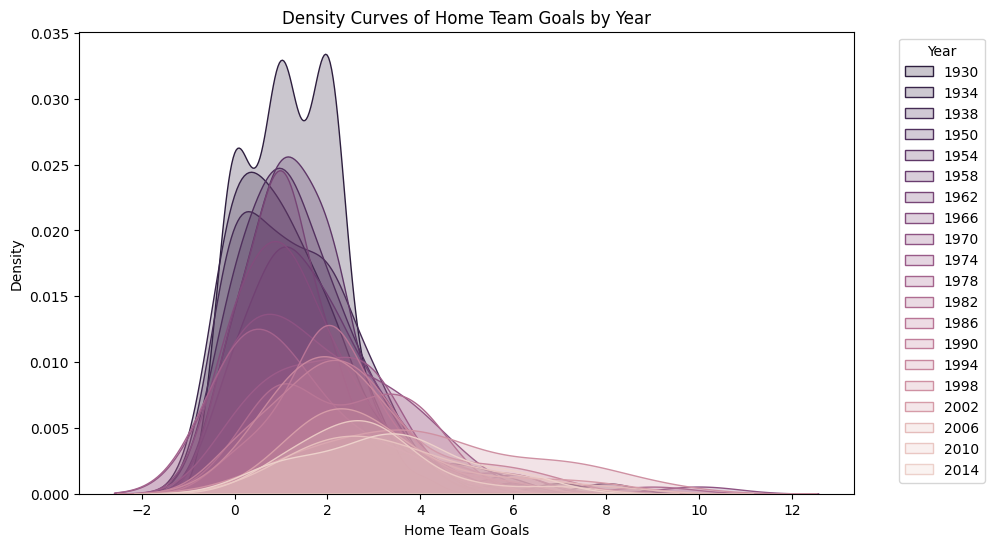

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

world_cup_matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')

df = world_cup_matches[['Year', 'Home Team Goals']]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Home Team Goals', hue='Year', fill=True)

plt.title('Density Curves of Home Team Goals by Year')
plt.xlabel('Home Team Goals')
plt.ylabel('Density')

unique_years = df['Year'].unique()
unique_years.sort()

plt.legend(title='Year', labels=unique_years, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

<ipython-input-13-5b02cfa677e1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


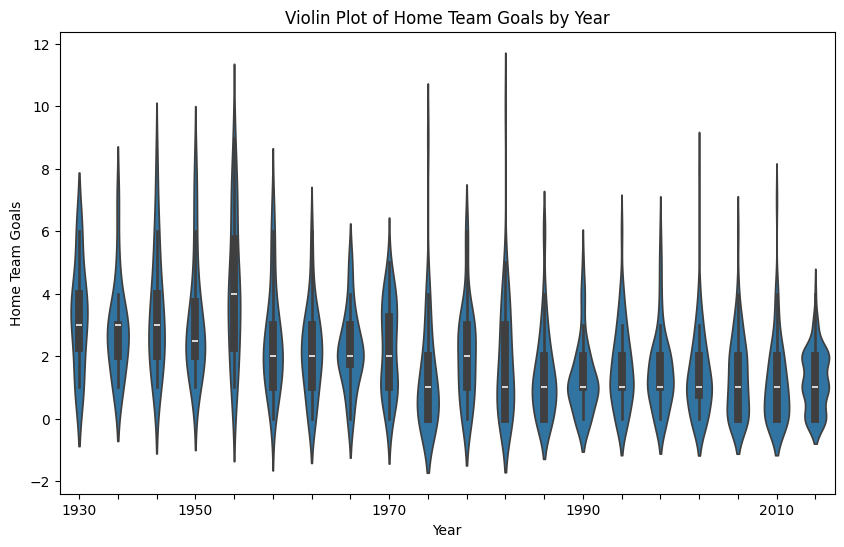

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='Year', y='Home Team Goals', data=df)
plt.title('Violin Plot of Home Team Goals by Year')
plt.xlabel('Year')
plt.ylabel('Home Team Goals')
labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = [label if label.endswith('0') else '' for label in labels]
ax.set_xticklabels(new_labels)
plt.show()



**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [ ]:
!pip install joypy

<Figure size 1200x800 with 0 Axes>

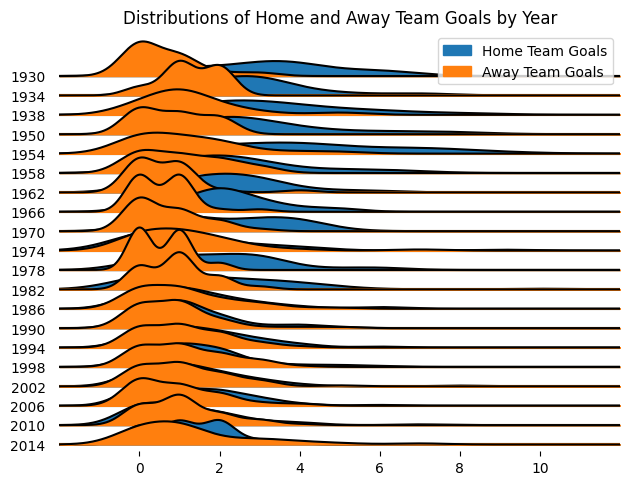

<ipython-input-16-271b557f260a>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Figure size 1200x800 with 0 Axes>

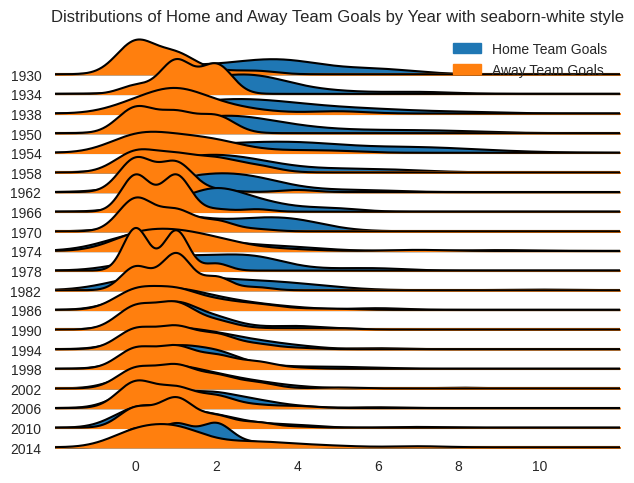

In [ ]:
import joypy as jp
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

world_cup_matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
df = world_cup_matches[['Year', 'Home Team Goals', 'Away Team Goals']]

plt.figure(figsize=(12, 8))
joyplot(data=df, by='Year', column=['Home Team Goals', 'Away Team Goals'], legend=True)
plt.title('Distributions of Home and Away Team Goals by Year')
plt.show()

plt.style.use('seaborn-white')

plt.figure(figsize=(12, 8))
joyplot(data=df, by='Year', column=['Home Team Goals', 'Away Team Goals'], legend=True)
plt.title('Distributions of Home and Away Team Goals by Year with seaborn-white style')
plt.show()


**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



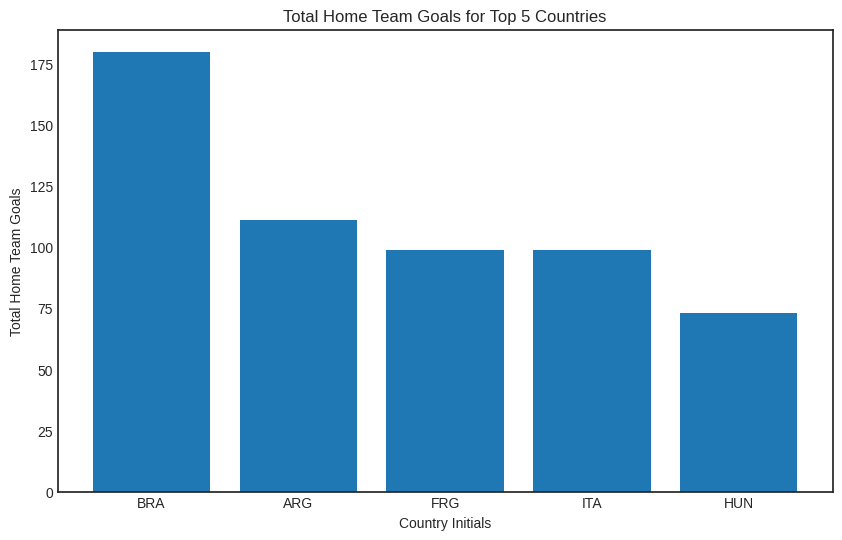

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

world_cup_matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')

grouped_df = world_cup_matches.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

top_5_countries = grouped_df.sort_values(by='Home Team Goals', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Home Team Initials'], top_5_countries['Home Team Goals'])
plt.title('Total Home Team Goals for Top 5 Countries')
plt.xlabel('Country Initials')
plt.ylabel('Total Home Team Goals')
plt.show()


**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



<Figure size 1200x800 with 0 Axes>

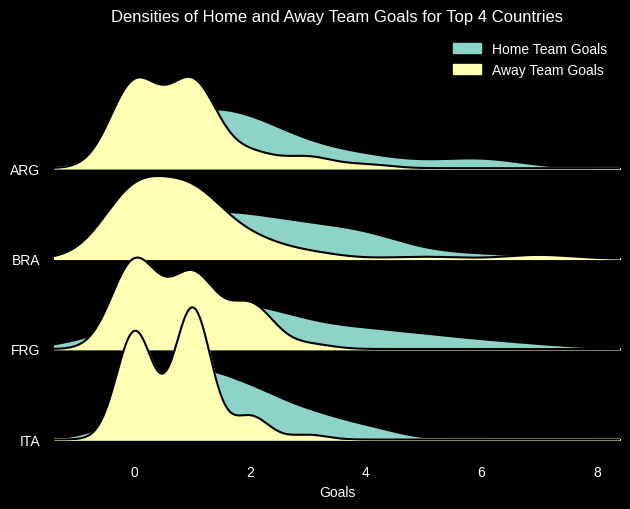

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

world_cup_matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')

grouped_df = world_cup_matches.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

top_4_countries = grouped_df.sort_values(by='Home Team Goals', ascending=False).head(4)

top_4_data = world_cup_matches[world_cup_matches['Home Team Initials'].isin(top_4_countries['Home Team Initials'])]

plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
joyplot(data=top_4_data, by='Home Team Initials', column=['Home Team Goals', 'Away Team Goals'], legend=True)
plt.title('Densities of Home and Away Team Goals for Top 4 Countries')
plt.xlabel('Goals')
plt.ylabel('Country Initials')
plt.show()


**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [ ]:
!pip install seaborn_qqplot

<Figure size 800x800 with 0 Axes>

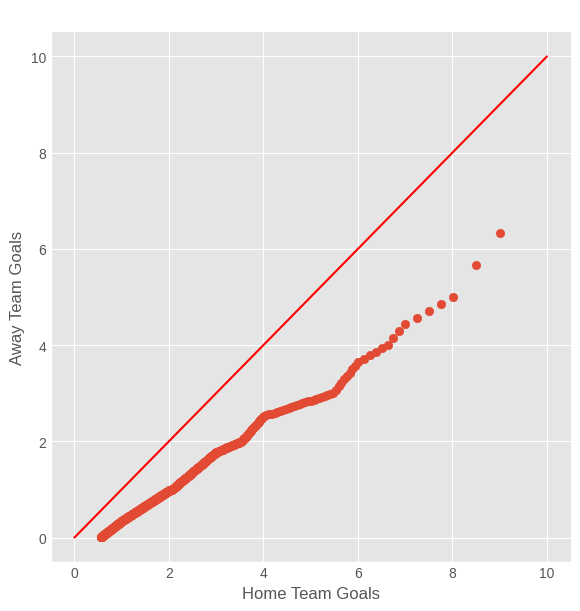

In [ ]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn_qqplot import pplot

world_cup_matches = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')

plt.figure(figsize=(8, 8))
pplot(world_cup_matches, x='Home Team Goals', y='Away Team Goals', kind='qq', height=6, aspect=1)
plt.title('QQ Plot: Home Team Goals vs. Away Team Goals')

max_goals = max(world_cup_matches['Home Team Goals'].max(), world_cup_matches['Away Team Goals'].max())
plt.plot([0, max_goals], [0, max_goals], color='red', linestyle='-')
plt.xlabel('Home Team Goals')
plt.ylabel('Away Team Goals')
plt.show()


Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

This plot visualizes the comparison of Home Team Goals and Away Team Goals.  The data points near the line specify that the distributions are similar, while points that deviate from it suggest differences between the distributions.

The data points are relatively close to the reference line when there were lower number of goals scored by the Home Team.  However, as the number of goals increases, the points start to move away from the line. This indicates that the distributions of higher goal counts are different for Home and Away teams.

